In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#FOR PLOTTING GRAPHS

def summarize_diagnostics(history):

  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy / Training Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # plot accuracy
  plt.subplot(212)
  plt.title('Classification / Training Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.tight_layout()


In [ ]:
# FOR CONFUSION MATRIX

def predict_test_classes(model):
    test_it = datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/test', class_mode = 'binary', batch_size = 8, target_size = (200, 200), shuffle = False)
    y_pred_classes = np.argmax(model.predict(test_generator), axis=1)
    #print(y_pred_classes)

    # Get actual classes
    y_true = test_generator.classes


    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes))


In [ ]:
# define cnn model
def vgg3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))

	opt = SGD(learning_rate=0.001)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
20/20 [==============================] - 66s 3s/step - loss: 0.7575 - accuracy: 0.5938 - val_loss: 0.6323 - val_accuracy: 0.7000
Epoch 2/20
20/20 [==============================] - 22s 1s/step - loss: 0.6218 - accuracy: 0.6500 - val_loss: 0.5945 - val_accuracy: 0.7500
Epoch 3/20
20/20 [==============================] - 22s 1s/step - loss: 0.4997 - accuracy: 0.7750 - val_loss: 0.5495 - val_accuracy: 0.7500
Epoch 4/20
20/20 [==============================] - 21s 1s/step - loss: 0.4634 - accuracy: 0.7750 - val_loss: 0.7966 - val_accuracy: 0.5250
Epoch 5/20
20/20 [==============================] - 24s 1s/step - loss: 0.3889 - accuracy: 0.8313 - val_loss: 0.4984 - val_accuracy: 0.7250
Epoch 6/20
20/20 [==============================] - 30s 2s/step - loss: 0.3309 - accuracy: 0.8813 - val_loss: 0.5618 - val_accuracy: 0.7750
Epoch 7/20
20/20 [==============================] - 23s 1s/step - loss: 0.2647 

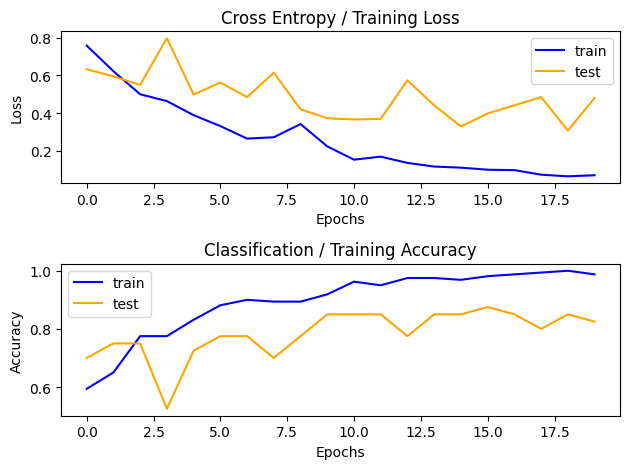

In [ ]:
model = vgg3()

datagen = ImageDataGenerator(rescale = 1.0/255.0)
train_it = datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/train', class_mode = 'binary', batch_size = 8, target_size = (200, 200))
test_it = datagen.flow_from_directory('drive/MyDrive/koala_vs_macaw/test', class_mode = 'binary', batch_size = 8, target_size = (200, 200))

history = model.fit(train_it, validation_data = test_it, epochs = 20)

loss, acc = model.evaluate(test_it, steps = len(test_it))

print('> Testing Accuracy: %.3f' % (acc * 100.0))
print(model.summary(show_trainable = True))

summarize_diagnostics(history)

In [ ]:
predict_test_classes(model)